Resources:

1. [Simple Image Classification using Convolutional Neural Network](https://becominghuman.ai/building-an-image-classifier-using-deep-learning-in-python-totally-from-a-beginners-perspective-be8dbaf22dd8)
2. [Keras Models](https://keras.io/applications/)
3. [Keras Tutorial : Using pre-trained Imagenet models](http://www.learnopencv.com/keras-tutorial-using-pre-trained-imagenet-models/)
4. [Deep Learning Model as REST API](https://shuaiw.github.io/2017/02/01/deep-learning-model-as-rest-api.html)
5. [Colaboratory Tips & Tricks](https://www.kdnuggets.com/2018/02/essential-google-colaboratory-tips-tricks.html?utm_content=buffer68ca7&utm_medium=social&utm_source=twitter.com&utm_campaign=buffer)
6. [Image Analogys (style transfer)](https://github.com/awentzonline/image-analogies)

# Setup

# New Section

In [0]:
!pip install -q keras
import keras


from google.colab import drive

In [34]:
drive.mount('/content/drive', force_remount =True)

Mounted at /content/drive


In [42]:
!cd drive
!ls

drive  sample_data


In [0]:
import sys, os, time
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import cv2


meta = scipy.io.loadmat("/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetValidationMetaDeta/meta.mat")
original_idx_to_synset = {}
synset_to_name = {}

for i in range(1000):
    ilsvrc2012_id = int(meta["synsets"][i,0][0][0][0])
    synset = meta["synsets"][i,0][1][0]
    name = meta["synsets"][i,0][2][0]
    original_idx_to_synset[ilsvrc2012_id] = synset
    synset_to_name[synset] = name

synset_to_keras_idx = {}
keras_idx_to_name = {}
f = open("/data/synset_words.txt","r")
idx = 0
for line in f:
    parts = line.split(" ")
    synset_to_keras_idx[parts[0]] = idx
    keras_idx_to_name[idx] = " ".join(parts[1:])
    idx += 1
f.close()

def convert_original_idx_to_keras_idx(idx):
    return synset_to_keras_idx[original_idx_to_synset[idx]]

In [0]:

f = open("/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetValidationMetaDeta/ILSVRC2012_validation_ground_truth.txt","r")
y_val = f.read().strip().split("\n")
y_val = list(map(int, y_val))
y_val = np.array([convert_original_idx_to_keras_idx(idx) for idx in y_val])
f.close()

In [0]:
np.save("/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetValidationMetaDeta/y_val.npy", y_val)

In [0]:
for i in range(0, 20):
  print(keras_idx_to_name[y_val[i]])

In [0]:
crow = 'https://pbs.twimg.com/profile_images/595665661470310401/VOb43bbP_400x400.jpg'
wolf = 'https://kids.nationalgeographic.com/content/dam/kids/photos/animals/Mammals/A-G/gray-wolf-closeup.adapt.945.1.jpg'
tiger = 'https://steemit-production-imageproxy-upload.s3.amazonaws.com/DQmenD8j2rha9SkqpB1gQDrkuE9FmjBTwxb4eGbmHQ81aGM'
sailboat = 'https://upload.wikimedia.org/wikipedia/commons/d/dd/Inland_cat_sailboat.jpg'
plane = "https://unsplash.com/photos/7ESmHghU_KY/download?force=true"
s = "https://unsplash.com/photos/wAoA4WkiDeo/download?force=true"

urls = ["" for x in range(6)]
urls[5] = s
urls[0] = crow
urls[1] = wolf
urls[4] = tiger
urls[2] = plane
urls[3] = sailboat

In [0]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

import urllib.request
import cv2
import numpy as np

# image loader
def url_to_image(url, resize=224):
  """
  downloads an image from url, converts to numpy array,
  resizes, and returns it
  """
  response = urllib.request.urlopen(url)
  img = np.asarray(bytearray(response.read()), dtype=np.uint8)
  img = cv2.imdecode(img, cv2.IMREAD_COLOR)
  img = cv2.resize(img, (resize, resize), interpolation=cv2.INTER_CUBIC)
  return img

# keras.application

In [0]:
from keras.applications import vgg16, inception_v3, resnet50, mobilenet, densenet
import numpy as np

#Need 224x224
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')
 
  
#Need 299x299
#Load the Inception_V3 model 
inception_model = inception_v3.InceptionV3(weights='imagenet') 
 

#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')
 
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')

#Need 224x224
#Load the densenet model
densenet3 = densenet.DenseNet121(weights='imagenet')

#Need 224x224
#Load the densenet model
densenet1 = densenet.DenseNet169(weights='imagenet')

#Need 224x224
#Load the densenet model
densenet2 = densenet.DenseNet201(weights='imagenet')



82526208/82524592 [==============================] - 1s 0us/step


In [0]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline
 


5

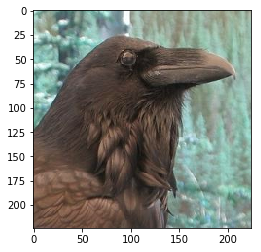

kite 0.29875907
prairie_chicken 0.14428526
hen 0.12260837
ruffed_grouse 0.056865923
vulture 0.04557885
_____________________________


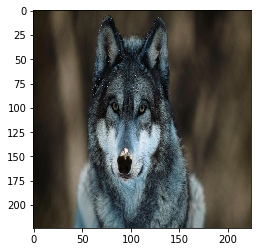

timber_wolf 0.3359997
Eskimo_dog 0.14115289
dingo 0.12966438
red_wolf 0.109238036
Norwegian_elkhound 0.100054495
_____________________________


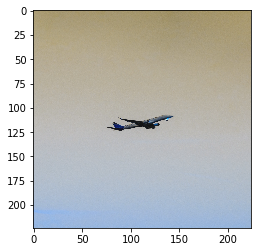

warplane 0.69959444
space_shuttle 0.17780812
airliner 0.08083409
wing 0.03176177
American_alligator 0.0012549558
_____________________________


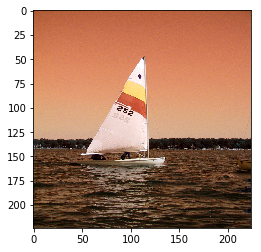

catamaran 0.84063613
trimaran 0.1381897
yawl 0.014605398
beacon 0.002596811
airliner 0.0009346112
_____________________________


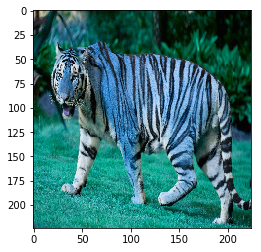

tiger 0.6490948
tiger_cat 0.20751184
zebra 0.078506514
jaguar 0.025187323
Egyptian_cat 0.01385318
_____________________________


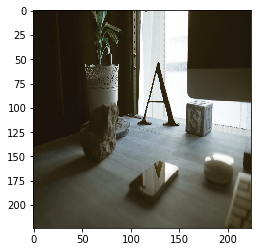

thimble 0.30300432
pill_bottle 0.20997706
paintbrush 0.12863886
mortar 0.07726334
rubber_eraser 0.058233835
_____________________________


In [0]:

for url in urls: 
#   print(url)
  original = url_to_image(url, 224)
#   print('PIL original image size',original.size)
  plt.imshow(original)
  plt.show()

  # convert the PIL image to a numpy array
  # IN PIL - image is in (width, height, channel)
  # In Numpy - image is in (height, width, channel)a
  numpy_image = img_to_array(original)
#   plt.imshow(np.uint8(numpy_image))
  # plt.show()
#   print('numpy array size',numpy_image.shape)

  # Convert the image / images into batch format
  # expand_dims will add an extra dimension to the data at a particular axis
  # We want the input matrix to the network to be of the form (batchsize, height, width, channels)
  # Thus we add the extra dimension to the axis 0.
  image_batch = np.expand_dims(numpy_image, axis=0)
  #  print('image batch size', image_batch.shape)

  processed_image = densenet.preprocess_input(image_batch.copy())
  # get the predicted probabilities for each class
  predictions = densenet1.predict(processed_image)
  # print predictions
  # convert the probabilities to class labels
  # We will get top 5 predictions which is the default
#   plt.imshow(original)
  for prediction in decode_predictions(predictions)[0]:
    print(prediction[1], prediction[2])
  print("_____________________________")
  # plt.imshow(np.uint8(image_batch[0]))

In [0]:
# prepare the image for the VGG model
processed_image = densenet.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = densenet1.predict(processed_image)

# print predictions
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
# plt.imshow(original)


for prediction in decode_predictions(predictions)[0]:
  print(prediction[1], prediction[2])

tiger 0.6490948
tiger_cat 0.20751184
zebra 0.078506514
jaguar 0.025187323
Egyptian_cat 0.01385318


wing 0.5013805
warplane 0.23773035
airliner 0.21418506
space_shuttle 0.012688187
dragonfly 0.01010606


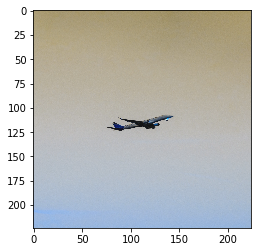

In [0]:
# prepare the image for the VGG model
processed_image = densenet.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = densenet2.predict(processed_image)

# print predictions
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
plt.imshow(original)
for prediction in decode_predictions(predictions)[0]:
  print(prediction[1], prediction[2])

wing 0.39725965
warplane 0.3322554
airliner 0.2266911
airship 0.023404313
space_shuttle 0.013570343


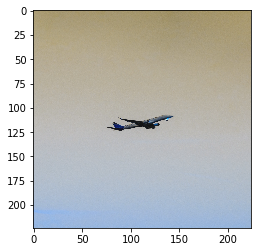

In [0]:
# prepare the image for the VGG model
processed_image = densenet.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = densenet3.predict(processed_image)

# print predictions
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
plt.imshow(original)
for prediction in decode_predictions(predictions)[0]:
  print(prediction[1], prediction[2])

yawl 0.7427812
catamaran 0.067620486
trimaran 0.051548567
schooner 0.024784425
pirate 0.0009668583


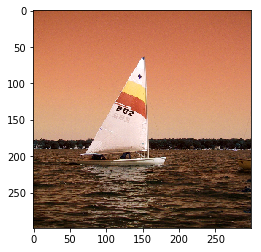

In [0]:
# prepare the image for the VGG model
processed_image = inception_v3.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = inception_model.predict(processed_image)

# print predictions
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
plt.imshow(original)
for prediction in decode_predictions(predictions)[0]:
  print(prediction[1], prediction[2])


yawl 0.43911487
catamaran 0.30459502
trimaran 0.15244274
schooner 0.08784651
beacon 0.0095507875


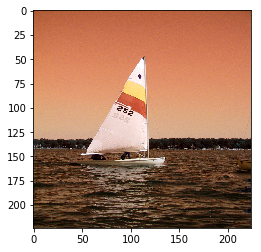

In [0]:
# prepare the image for the VGG model
processed_image = resnet50.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = resnet_model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
plt.imshow(original)
for prediction in decode_predictions(predictions)[0]:
  print(prediction[1], prediction[2])

catamaran 0.4891991
trimaran 0.29943752
yawl 0.20314239
schooner 0.0073370347
space_shuttle 0.00024042277


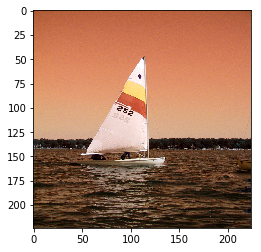

In [0]:
# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
plt.imshow(original)
for prediction in decode_predictions(predictions)[0]:
  print(prediction[1], prediction[2])